# Baseball Case Study

Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.columns.value_counts().sum()

17

In [8]:
# checking a shape of data
df.shape

(30, 17)

In [9]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Bivariate analysis

<AxesSubplot:xlabel='W', ylabel='R'>

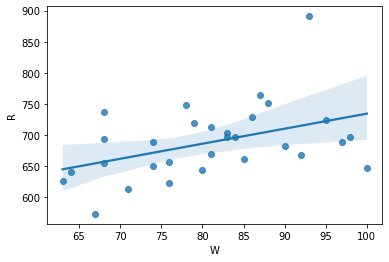

In [11]:
sns.regplot(data=df,x='W',y='R')

<AxesSubplot:xlabel='W', ylabel='AB'>

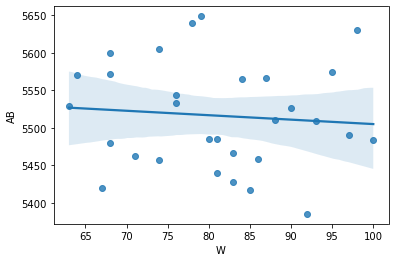

In [12]:
sns.regplot(data=df,x='W',y='AB')

<AxesSubplot:xlabel='W', ylabel='H'>

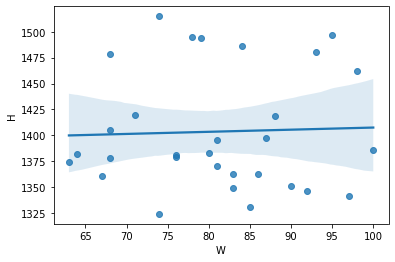

In [13]:
sns.regplot(data=df,x='W',y='H')

<AxesSubplot:xlabel='W', ylabel='2B'>

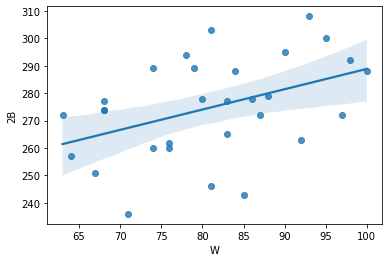

In [14]:
sns.regplot(data=df,x='W',y='2B')

<AxesSubplot:xlabel='W', ylabel='3B'>

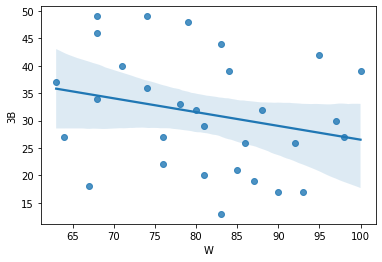

In [15]:
sns.regplot(data=df,x='W',y='3B')

<AxesSubplot:xlabel='W', ylabel='HR'>

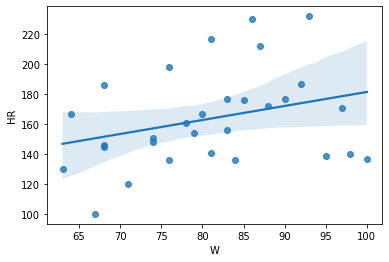

In [16]:
sns.regplot(data=df,x='W',y='HR')

<AxesSubplot:xlabel='W', ylabel='BB'>

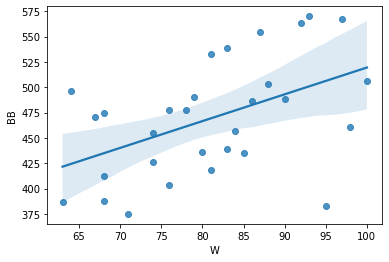

In [17]:
sns.regplot(data=df,x='W',y='BB')

<AxesSubplot:xlabel='W', ylabel='SO'>

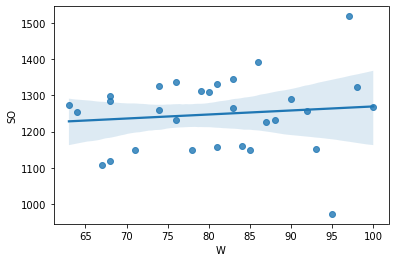

In [18]:
sns.regplot(data=df,x='W',y='SO')

<AxesSubplot:xlabel='W', ylabel='RA'>

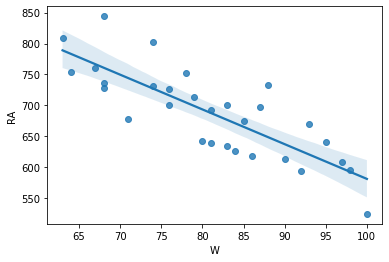

In [19]:
sns.regplot(data=df,x='W',y='RA')

<AxesSubplot:xlabel='W', ylabel='ER'>

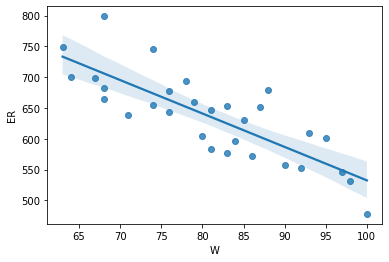

In [20]:
sns.regplot(data=df,x='W',y='ER')

<AxesSubplot:xlabel='W', ylabel='ERA'>

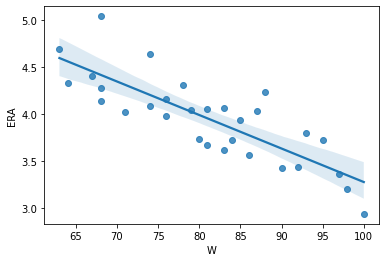

In [21]:
sns.regplot(data=df,x='W',y='ERA')

<AxesSubplot:xlabel='W', ylabel='CG'>

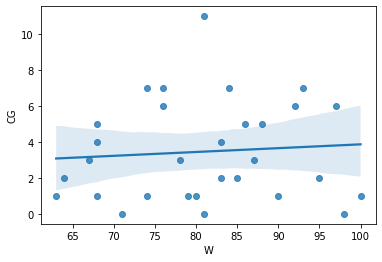

In [22]:
sns.regplot(data=df,x='W',y='CG')

<AxesSubplot:xlabel='W', ylabel='SHO'>

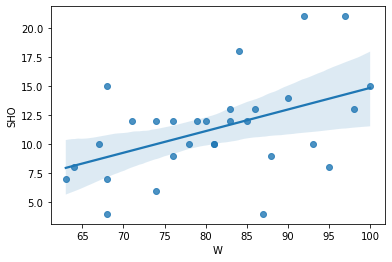

In [23]:
sns.regplot(data=df,x='W',y='SHO')

<AxesSubplot:xlabel='W', ylabel='SV'>

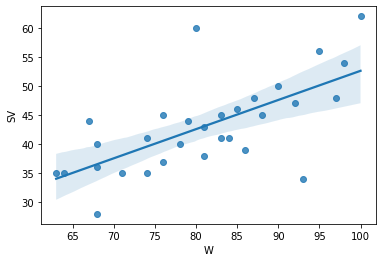

In [24]:
sns.regplot(data=df,x='W',y='SV')

<AxesSubplot:xlabel='W', ylabel='E'>

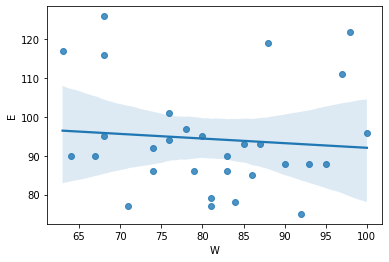

In [25]:
sns.regplot(data=df,x='W',y='E')

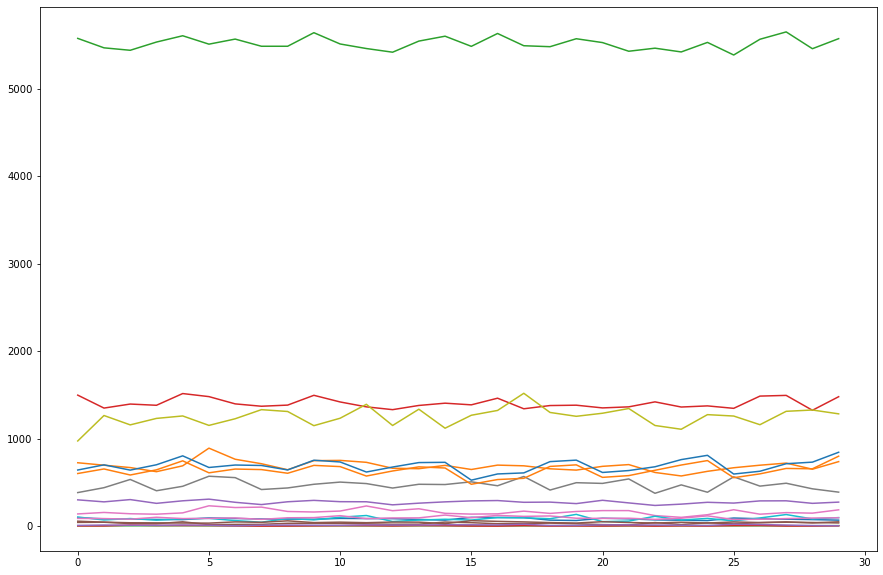

In [26]:
plt.figure(figsize=(15,10))
plt.plot(df)

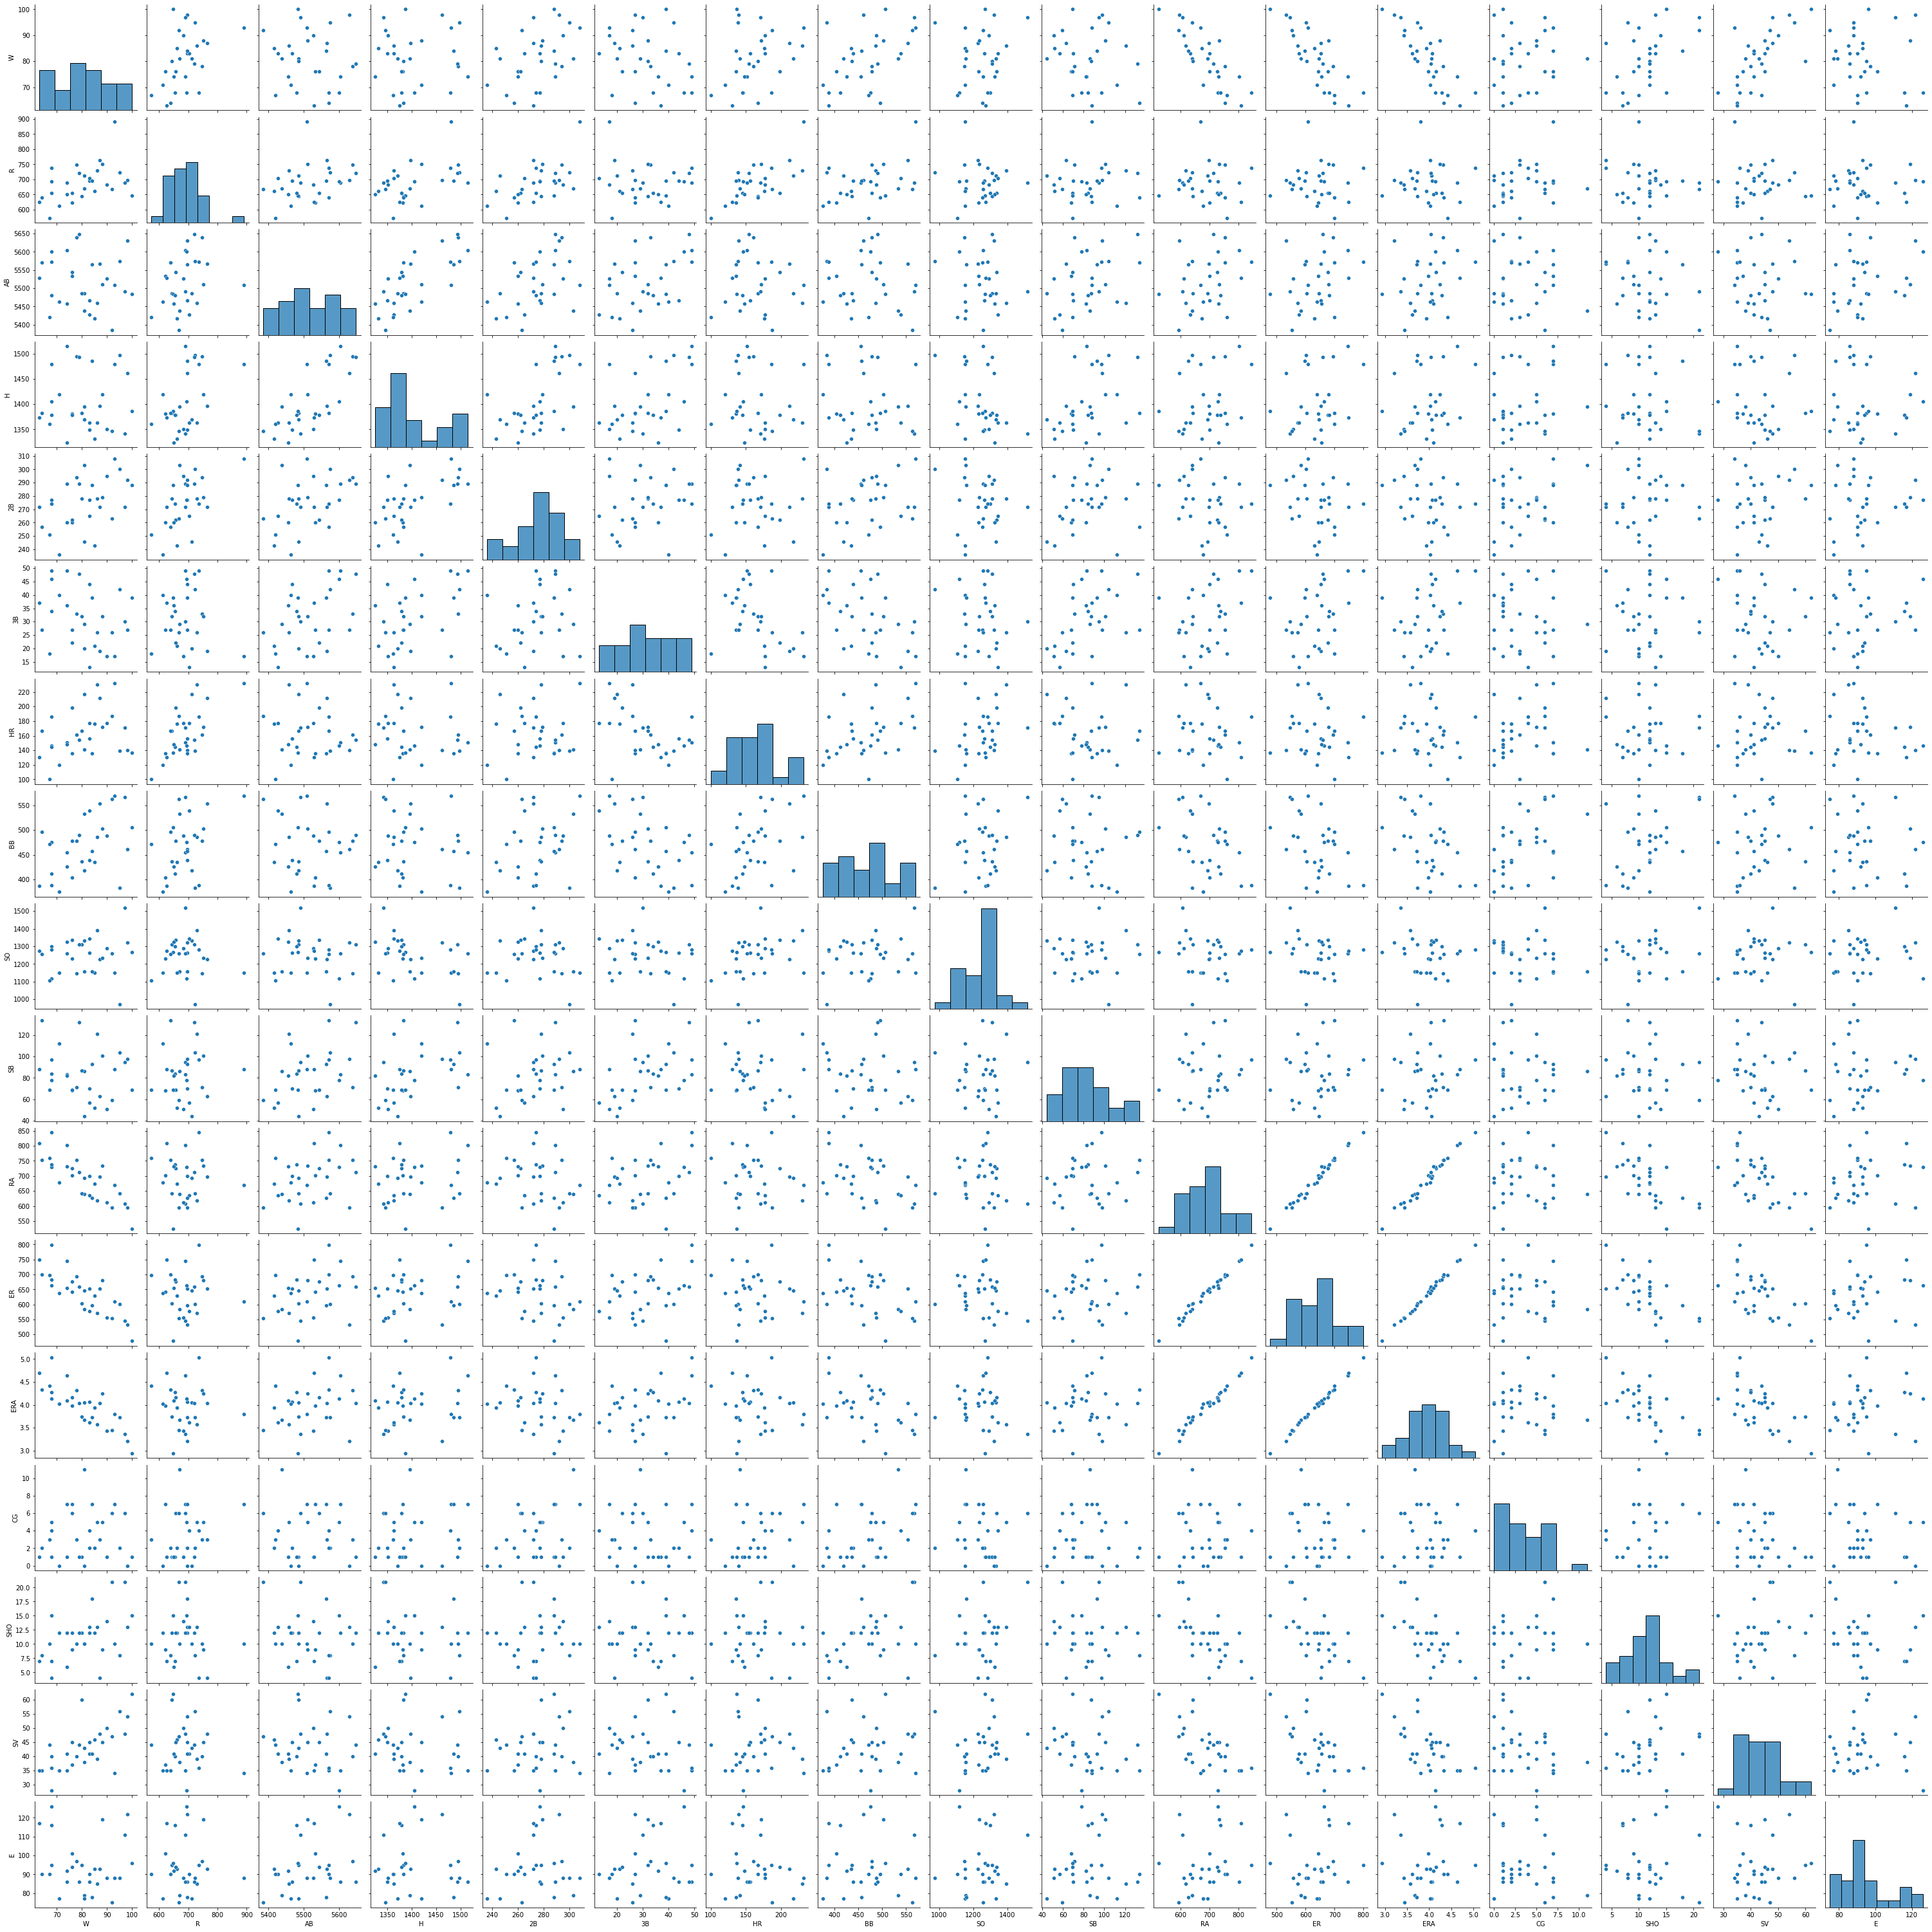

In [28]:
sns.pairplot(df,palette='set1')

In [29]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [30]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# correlation analysis

In [36]:
dfcor= df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


# showing the heat map for correlation

<AxesSubplot:>

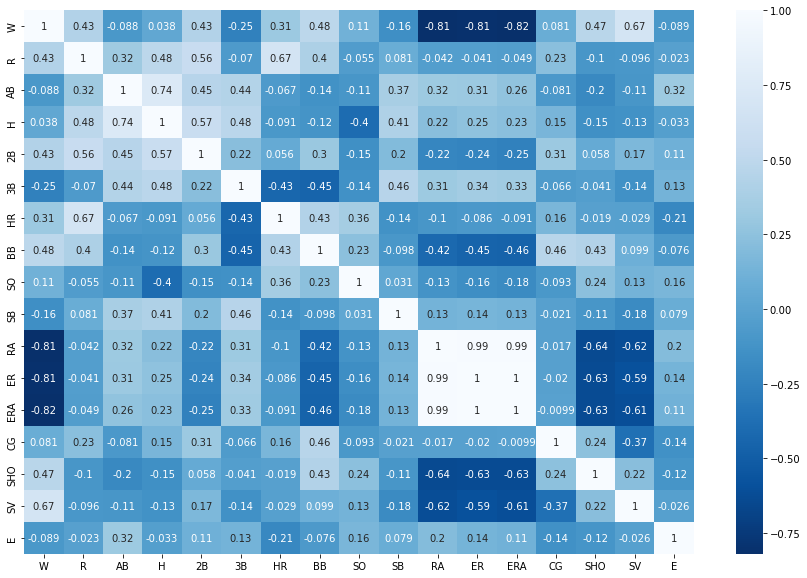

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues_r',annot=True)

# covraince analysis

In [34]:
df.cov()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,109.274713,264.594253,-64.783908,22.466667,80.921839,-27.437931,102.263218,288.865517,121.317241,-37.500000,-612.785057,-593.488506,-3.890471,2.326437,20.320690,54.829885,-13.057471
R,264.594253,3452.943678,1322.832184,1621.285057,595.547126,-43.037931,1255.295402,1349.251724,-333.668966,109.086207,-176.366667,-169.994253,-1.314977,37.680460,-25.003448,-44.567816,-19.080460
AB,-64.783908,1322.832184,4965.650575,2976.128736,578.108046,320.710345,-150.209195,-548.441379,-775.193103,599.068966,1605.728736,1530.666667,8.177218,-15.749425,-57.289655,-58.983908,311.563218
H,22.466667,1621.285057,2976.128736,3265.085057,586.112644,285.903448,-165.211494,-385.606897,-2364.627586,539.000000,924.285057,1011.954023,5.998230,23.363218,-34.268966,-58.622989,-26.459770
2B,80.921839,595.547126,578.108046,586.112644,327.443678,41.703448,32.416092,312.510345,-283.048276,80.517241,-284.659770,-298.942529,-2.094115,15.335632,4.324138,24.432184,26.712644
3B,-27.437931,-43.037931,320.710345,285.903448,41.703448,109.251724,-143.334483,-271.306897,-153.131034,109.086207,236.755172,249.431034,1.570793,-1.903448,-1.782759,-11.710345,18.482759
HR,102.263218,1255.295402,-150.209195,-165.211494,32.416092,-143.334483,1012.722989,772.900000,1188.455172,-99.155172,-238.428736,-191.787356,-1.313805,13.763218,-2.506897,-7.147126,-92.218391
BB,288.865517,1349.251724,-548.441379,-385.606897,312.510345,-271.306897,772.900000,3255.127586,1383.186207,-128.017241,-1713.265517,-1811.465517,-11.913069,72.917241,100.141379,44.648276,-60.275862
SO,121.317241,-333.668966,-775.193103,-2364.627586,-283.048276,-153.131034,1188.455172,1383.186207,10766.027586,73.310345,-970.737931,-1176.172414,-8.498207,-26.786207,101.627586,103.124138,224.689655
SB,-37.500000,109.086207,599.068966,539.000000,80.517241,109.086207,-99.155172,-128.017241,73.310345,520.534483,217.637931,228.948276,1.306034,-1.310345,-10.017241,-32.931034,25.206897


<AxesSubplot:>

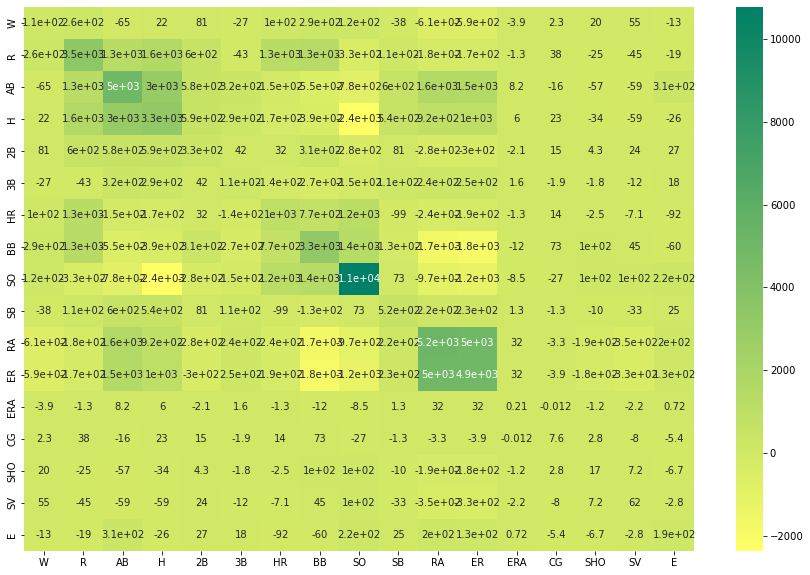

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.cov(),annot=True,cmap='summer_r')

<AxesSubplot:>

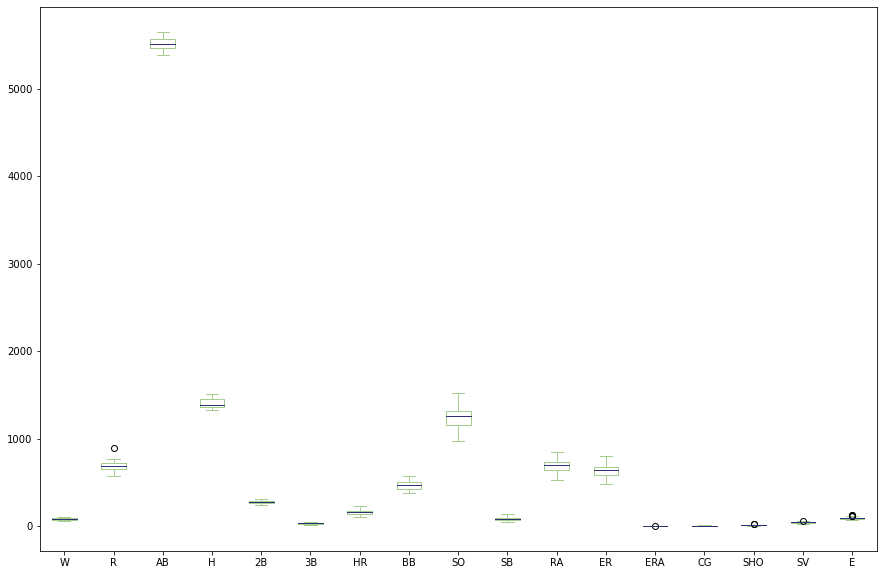

In [38]:
#checking for outliers
df.plot(kind='box',cmap='crest',figsize=(15,10))

<AxesSubplot:xlabel='R'>

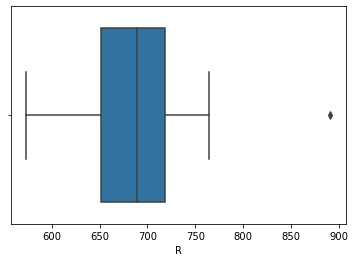

In [40]:
sns.boxplot(data=df,x='R')

<AxesSubplot:xlabel='ERA'>

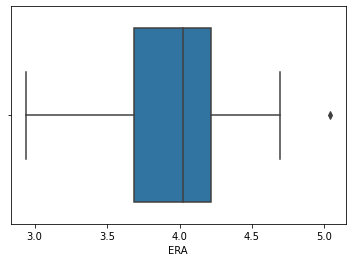

In [41]:
sns.boxplot(data=df,x='ERA')

<AxesSubplot:xlabel='SHO'>

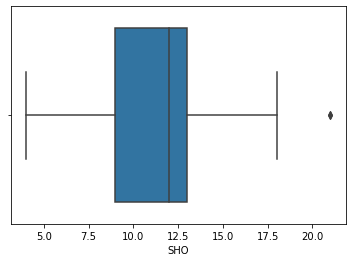

In [42]:
sns.boxplot(data=df,x='SHO',orient='v')

<AxesSubplot:xlabel='SV'>

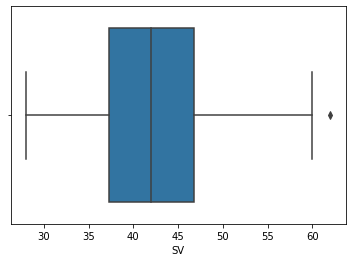

In [43]:
sns.boxplot(data=df,x='SV')

<AxesSubplot:xlabel='E'>

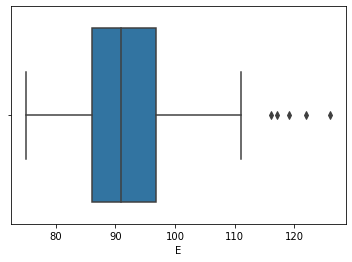

In [44]:
sns.boxplot(data=df,x='E')

# Checking skewness in dataset

In [46]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [47]:
#Data Cleaning
#removing a outliers

In [48]:
from scipy.stats import zscore

z_score=abs(zscore(df))

print('This is old df :',df.shape)

df_final = df.loc[(z_score<3).all(axis=1)]

print('This is new_df :',df_final.shape)


This is old df : (30, 17)
This is new_df : (29, 17)


In [49]:
df_final.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [50]:
df_loss = (30-29)/30*100
df_loss

3.3333333333333335

# splitting x and y

In [51]:
x =df_final.drop(['W'],axis=1)
y=df_final.iloc[:,0]

In [52]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [53]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Trsnforming & removing the skewness

In [54]:
from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

In [55]:
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [56]:
#check data 

In [57]:
x=pd.DataFrame(x)

In [58]:
x.skew()

0    -0.024842
1     0.000000
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.011974
10   -0.004988
11   -0.000401
12   -0.045947
13    0.000529
14   -0.000925
15    0.065585
dtype: float64

# plotting distplot through iteration

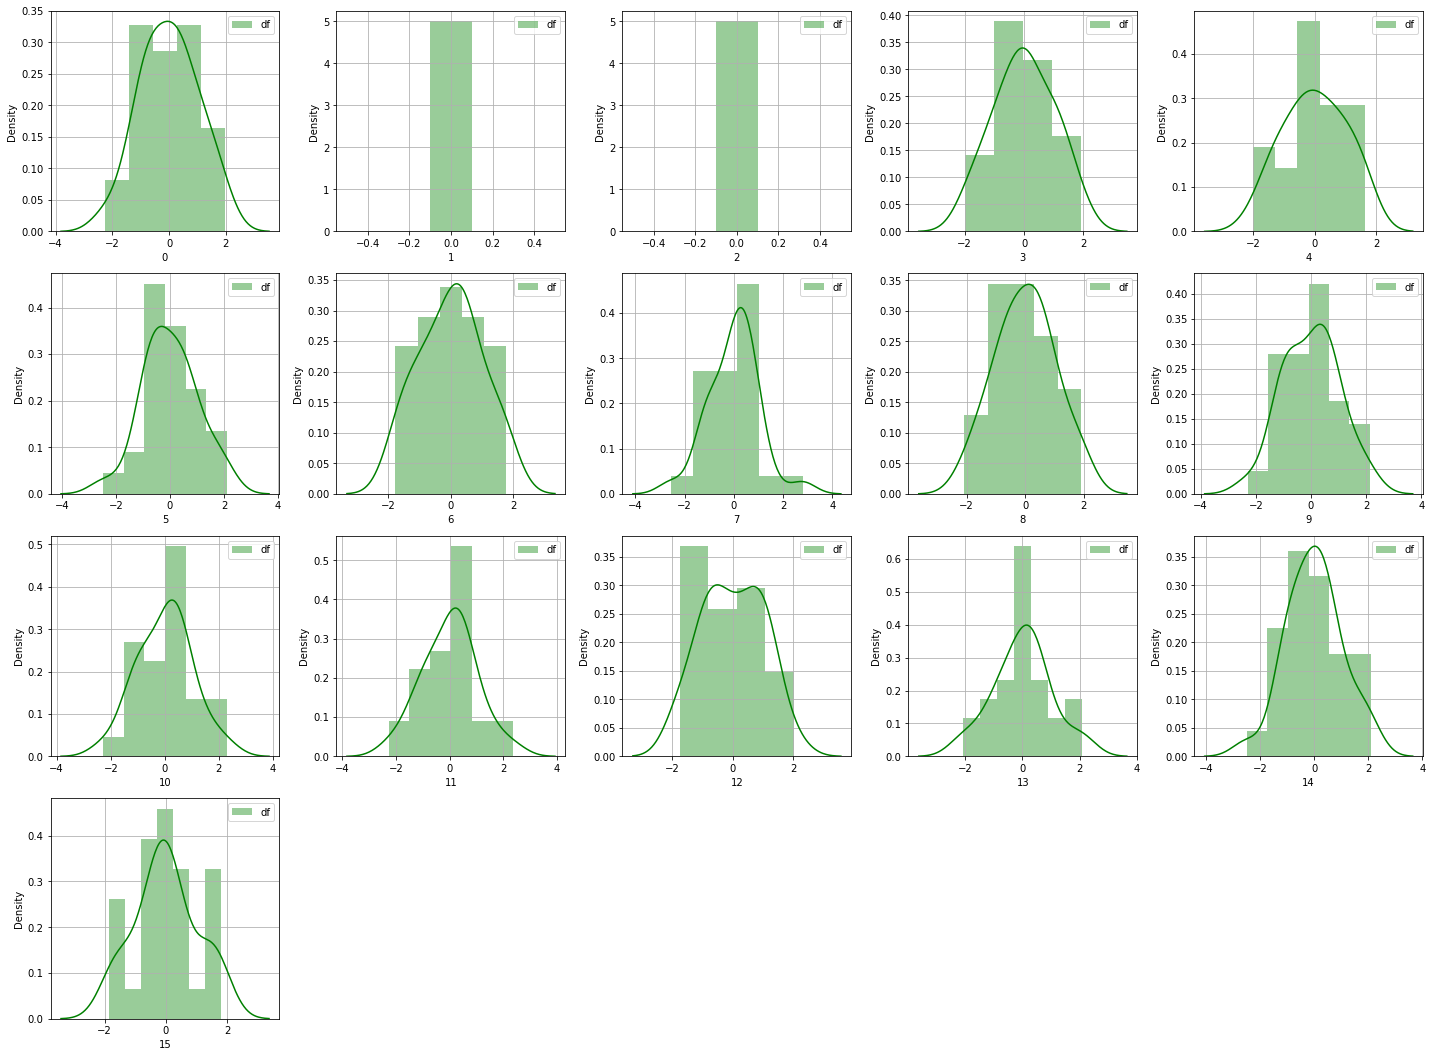

In [59]:
plt.figure(figsize=(20,18))
for i ,col in enumerate(list(x.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(x[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [60]:
from sklearn.feature_selection import VarianceThreshold
var_thre = VarianceThreshold(threshold=0.0)
var_thre.fit(x)

VarianceThreshold()

In [61]:
var_thre.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [62]:
x.columns[var_thre.get_support()]

Int64Index([0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [63]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820


# checking variance inflation factor

In [64]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
def calcvif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vlf factor']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [66]:
x = x.iloc[:,:-1]
calcvif(x)

,variables,vlf factor
0,0,3.652063
1,1,NaN
2,2,NaN
3,3,2.757762
4,4,2.949272
5,5,5.815040
6,6,3.087869
7,7,2.913134
8,8,2.056055
9,9,163.344221


In [67]:
x.drop([10], axis=1,inplace=True)

In [68]:
x = x.iloc[:,:-1]
calcvif(x)

,variables,vlf factor
0,0,3.574143
1,1,NaN
2,2,NaN
3,3,2.526846
4,4,2.905625
5,5,4.346635
6,6,2.974961
7,7,2.395374
8,8,1.606359
9,9,63.133012


In [69]:
#now choosing randam state and doing train test
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    modrf = RandomForestRegressor()
    modrf.fit(x_train,y_train)
    pred=modrf.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc>=acc
        maxRS=i
print(f"best accuray is:{maxAcc} on random_state:{maxRS}")

best accuray is:0 on random_state:198


In [72]:
x_train.shape

(23, 13)

In [73]:
y_train.shape

(23,)

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=199)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [76]:
#checking R2 score for remdom forest regressor

lr = LinearRegression()
lr.fit(x_train,y_train)

pred = lr.predict(x_test)
print('R2 score:',r2_score(y_test,pred))
print('mean abs error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))

R2 score: 0.6549310611875319
mean abs error: 4.546641187130331
mean squared error: 27.80680531930472


In [77]:
lr.intercept_

80.0379760664563

In [78]:
lr.coef_

array([ 4.50564738e+00, -2.30371278e-15, -1.77635684e-15, -3.14456132e-02,
        6.69986090e-01, -1.65319015e+00, -7.53971031e-01,  1.01606327e+00,
       -1.87420536e+00, -9.14009859e+00,  3.58936264e-01,  1.00954232e+00,
       -1.26124104e-01])

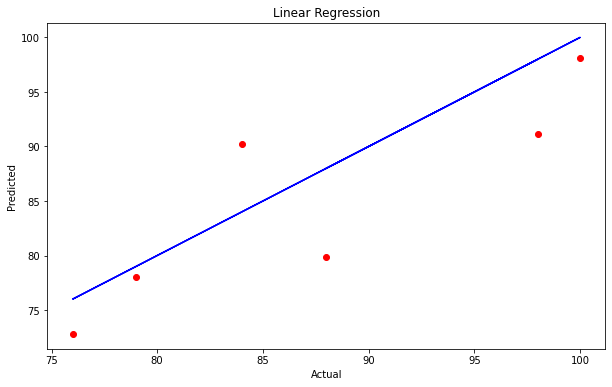

In [79]:
#verifying the preformance of the model in graph

plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

In [80]:
#Random Forest Regressor

rf = RandomForestRegressor(n_estimators= 100,random_state=199,min_samples_leaf=1,bootstrap = True , verbose = 0)
rf.fit(x_train,y_train)

predrf = rf.predict(x_test)
print("R2 score is :",r2_score(y_test,predrf))
print("Mean abs error:",mean_absolute_error(y_test,predrf))
print("Mean squared error:",mean_squared_error(y_test,predrf))

R2 score is : -0.0398649431230611
Mean abs error: 7.581666666666666
Mean squared error: 83.79578333333333


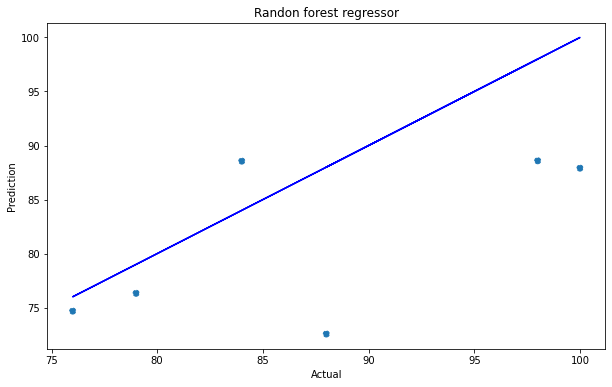

In [81]:
#verifying the preformance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x = y_test, y =predrf , cmap= 'set1', linestyle = '--')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title('Randon forest regressor')
plt.show()

In [82]:
#KNN regssore
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights= 'uniform',algorithm='auto',leaf_size=30)
knn.fit(x_train,y_train)
predkn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,predkn))
print("Mean abs error:",mean_absolute_error(y_test,predkn))
print("Mean squared error:",mean_squared_error(y_test,predkn))

R2_score: -0.40459152016545996
Mean abs error: 9.533333333333333
Mean squared error: 113.18666666666665


Text(0.5, 1.0, 'KNeighbors regressor')

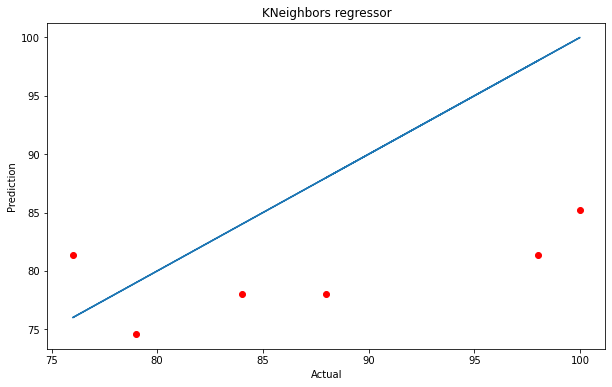

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x = y_test, y = predkn,color='r')
plt.plot(y_test,y_test)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("KNeighbors regressor")

In [84]:
#Super vector regressor
from sklearn.svm import SVR
sv = SVR(kernel='rbf',degree=3,gamma='scale')
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print("R2_score:",r2_score(y_test,predsv))
print("Mean abs error:",mean_absolute_error(y_test,predsv))
print("Mean squared error:",mean_squared_error(y_test,predsv))

R2_score: -0.5993682417496247
Mean abs error: 8.905781717015794
Mean squared error: 128.88242414765725


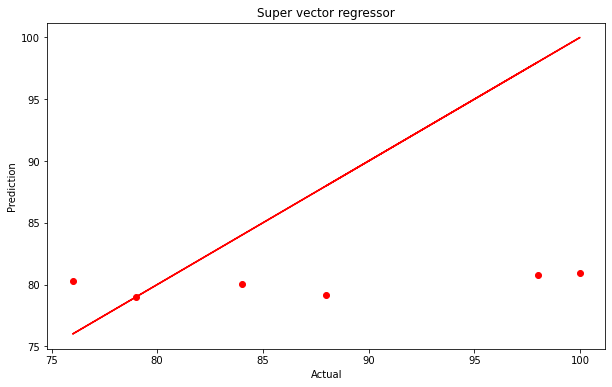

In [85]:
#verifying preformance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x = y_test,y = predsv,color='r')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual")
plt.ylabel('Prediction')
plt.title("Super vector regressor")
plt.show()

# cross validation

In [88]:
#linear regression
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=7).mean()

0.2391402884372583

In [89]:
#random forest regressor
cross_val_score(rf,x,y,cv=5).mean()

-0.5848925315718455

In [90]:
#knn regressor
cross_val_score(knn,x,y,cv=5).mean()

-0.11159634144163166

In [91]:
#svr regressor
cross_val_score(sv,x,y,cv=8).mean()

-0.47899155511041047

# Hyperparameter tuning

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

In [93]:
LinearRegression()

LinearRegression()

In [94]:
from sklearn.model_selection import GridSearchCV
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}

In [95]:
gcv = GridSearchCV(LinearRegression(),parameters,cv=None)
gcv.fit(x_train,y_train)
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [97]:
best_mod = LinearRegression(copy_X= True, fit_intercept= True)
best_mod.fit(x_train,y_train)

LinearRegression()

In [98]:
lr_pred=best_mod.predict(x_test)
acc=r2_score(y_test,lr_pred)
print(acc*100)

65.49310611875319


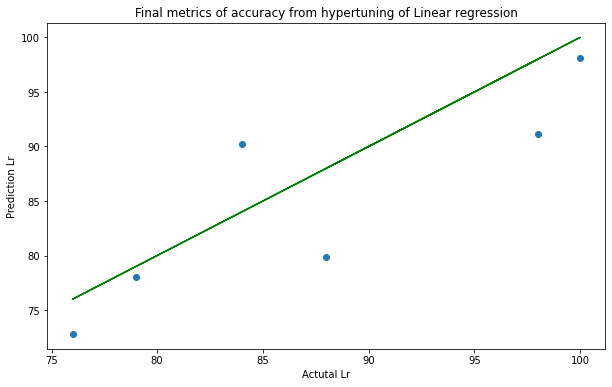

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=lr_pred,cmap='g')

plt.plot(y_test,y_test,color='g')
plt.xlabel("Actutal Lr")
plt.ylabel("Prediction Lr")
plt.title("Final metrics of accuracy from hypertuning of Linear regression")
plt.show()

In [101]:
#saving the model
import joblib
joblib.dump(best_mod,'bEST lr model.pkl')

['bEST lr model.pkl']